In [ ]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import StandardScaler

# Directory containing the cleaned CSV files
RAW_DATA_DIR = Path.cwd().parent.parent / "data" / "raw"
POPULATION_DIR = RAW_DATA_DIR / "population_data"
CLEANED_DIR = Path.cwd().parent.parent / "data" / "processed" / "cleaned_data"
PROJECTED_DATA = Path.cwd().parent.parent / "data" / "processed" / "projected_data"
CRIME_DATA = CLEANED_DIR / "cleaned_crime_data.csv"
ECONOMIC_DATA = CLEANED_DIR / "cleaned_economic_data.csv"
EDUCATION_DATA = CLEANED_DIR / "cleaned_education_data.csv"
HOUSING_DATA = CLEANED_DIR / "cleaned_housing_data.csv"
JOB_OPENINGS_DATA = CLEANED_DIR / "cleaned_job_openings_data.csv"
STUDENT_TEACHER_DATA = CLEANED_DIR / "erie_student_teacher.csv"
POP_PROJECT = PROJECTED_DATA / "county_population_projections.csv"
POP_2023 = POPULATION_DIR / "census_population_data_2023.csv"
PUBLIC_SCHOOL_DATA = CLEANED_DIR / "cleaned_public_school_data.csv"


In [4]:
# crime_df = pd.read_csv(CRIME_DATA)
county_with_geo = pd.read_csv(POP_PROJECT)
economic_df = pd.read_csv(ECONOMIC_DATA)
education_df = pd.read_csv(EDUCATION_DATA)
housing_df = pd.read_csv(HOUSING_DATA)
job_openings_df = pd.read_csv(JOB_OPENINGS_DATA)
public_school_df = pd.read_csv(PUBLIC_SCHOOL_DATA)

# Merge all dataframes on COUNTY_FIPS
merged_df = economic_df.merge(
    education_df, on=['COUNTY_FIPS','STATE','COUNTY','NAME','POPULATION', 'YEAR'], how='inner'
).merge(
    housing_df, on=['COUNTY_FIPS','STATE','COUNTY','NAME','POPULATION', 'YEAR'], how='inner'
).merge(
    job_openings_df, on=['COUNTY_FIPS','STATE','COUNTY','NAME','POPULATION', 'YEAR'], how='inner'
).merge(
    public_school_df, on=['COUNTY_FIPS','STATE','COUNTY','NAME','POPULATION', 'YEAR'], how='inner'
)

# Drop columns containing 'z_score'
merged_df = merged_df.loc[:, ~merged_df.columns.str.contains('z_score', case=False)]

In [5]:
merged_df.columns


Index(['MEDIAN_INCOME', 'TOTAL_EMPLOYED_POPULATION', 'UNEMPLOYED_PERSONS',
       'TOTAL_LABOR_FORCE', 'COUNTY_FIPS', 'YEAR', 'UNEMPLOYMENT_RATE',
       'POPULATION', 'STATE', 'COUNTY', 'NAME', 'TOTAL_POPULATION_25_64',
       'LESS_THAN_HIGH_SCHOOL_TOTAL', 'HIGH_SCHOOL_GRADUATE_TOTAL',
       'SOME_COLLEGE_TOTAL', 'BACHELORS_OR_HIGHER_TOTAL',
       'TOTAL_ENROLLED_AND_NOT_ENROLLED', 'TOTAL_ENROLLED',
       'ENROLLED_NURSERY_PRESCHOOL', 'ENROLLED_KINDERGARTEN',
       'ENROLLED_GRADE1_4', 'ENROLLED_GRADE5_8', 'ENROLLED_GRADE9_12',
       'ENROLLED_COLLEGE_UNDERGRAD', 'ENROLLED_GRADUATE_PROFESSIONAL',
       'LESS_THAN_HIGH_SCHOOL_UNEMPLOYED', 'HIGH_SCHOOL_GRADUATE_UNEMPLOYED',
       'SOME_COLLEGE_UNEMPLOYED', 'BACHELORS_OR_HIGHER_UNEMPLOYED', 'MALE_5-9',
       'MALE_10-14', 'MALE_15-17', 'FEMALE_5-9', 'FEMALE_10-14',
       'FEMALE_15-17', 'ELEMENTARY_SCHOOL_POPULATION',
       'MIDDLE_SCHOOL_POPULATION', 'HIGH_SCHOOL_POULATION',
       'TOTAL_HOUSING_UNITS', 'OCCUPIED_HOUSING_UNI

In [4]:
student_teacher_df = pd.read_csv(STUDENT_TEACHER_DATA)

erie_df = merged_df.loc[merged_df["COUNTY_FIPS"] == 36029].copy()
pd.set_option('display.max_columns', None)
erie_df = erie_df.merge(
    student_teacher_df[student_teacher_df["COUNTY_FIPS"] == 36029], 
    on=['COUNTY_FIPS'], 
    how='left'
)

erie_df.loc[erie_df["Year"] != 2023, ["Students", "Teachers", "Student Teacher Ratio", "Elementary_Population", "Middle_Population", "High_Population"]] = 0
erie_df

,MEDIAN_INCOME,TOTAL_EMPLOYED_POPULATION,UNEMPLOYED_PERSONS,TOTAL_LABOR_FORCE,COUNTY_FIPS,Year,UNEMPLOYMENT_RATE,POPULATION,STATE,COUNTY,NAME,TOTAL_POPULATION_25_64,LESS_THAN_HIGH_SCHOOL_TOTAL,HIGH_SCHOOL_GRADUATE_TOTAL,SOME_COLLEGE_TOTAL,BACHELORS_OR_HIGHER_TOTAL,TOTAL_ENROLLED_AND_NOT_ENROLLED,TOTAL_ENROLLED,ENROLLED_NURSERY_PRESCHOOL,ENROLLED_KINDERGARTEN,ENROLLED_GRADE1_4,ENROLLED_GRADE5_8,ENROLLED_GRADE9_12,ENROLLED_COLLEGE_UNDERGRAD,ENROLLED_GRADUATE_PROFESSIONAL,LESS_THAN_HIGH_SCHOOL_UNEMPLOYED,HIGH_SCHOOL_GRADUATE_UNEMPLOYED,SOME_COLLEGE_UNEMPLOYED,BACHELORS_OR_HIGHER_UNEMPLOYED,TOTAL_HOUSING_UNITS,OCCUPIED_HOUSING_UNITS,MEDIAN_HOUSING_VALUE,MEDIAN_GROSS_RENT,HOUSE_AFFORDABILITY,JOB_OPENING_JAN,JOB_OPENING_FEB,JOB_OPENING_MAR,JOB_OPENING_APR,JOB_OPENING_MAY,JOB_OPENING_JUN,JOB_OPENING_JUL,JOB_OPENING_AUG,JOB_OPENING_SEP,JOB_OPENING_OCT,JOB_OPENING_NOV,JOB_OPENING_DEC,Students,Teachers,Student Teacher Ratio,Elementary_Population,Middle_Population,High_Population
0,27366.0,432735.0,37700.0,470435.0,36029,2011,8.01,919714,36,29,"Erie County, New York",479061.0,37339.0,126417.0,155800.0,159505.0,891358,244719,13796,11850,43384,47023,51252,61149,16265,3543.0,8443.0,8114.0,4631.0,420164,379478,120600.0,704.0,0.308704,8815.0,9101.0,8624.0,9434.0,9101.0,9672.0,9958.0,8958.0,10340.0,9863.0,10578.0,10530.0,0.0,0.00,0.000000,0,0,0
1,27700.0,435659.0,39053.0,474712.0,36029,2012,8.23,919542,36,29,"Erie County, New York",479693.0,36189.0,124781.0,157554.0,161169.0,890859,242891,13183,11193,42247,47265,50419,62713,15871,3551.0,8563.0,8340.0,5046.0,420143,379980,123400.0,713.0,0.308881,10334.0,9955.0,10855.0,10713.0,10950.0,10855.0,11140.0,12799.0,11235.0,10855.0,11235.0,11756.0,0.0,0.00,0.000000,0,0,0
2,27978.0,434684.0,40808.0,475492.0,36029,2013,8.58,919230,36,29,"Erie County, New York",481013.0,35261.0,123796.0,157963.0,163993.0,890657,239190,12894,10958,41641,46713,49207,61807,15970,3494.0,9063.0,9436.0,5345.0,419815,380152,124300.0,724.0,0.310530,12265.0,11746.0,12831.0,10472.0,10708.0,10944.0,10095.0,11132.0,11227.0,11510.0,10991.0,11038.0,0.0,0.00,0.000000,0,0,0
3,28512.0,437327.0,37733.0,475060.0,36029,2014,7.94,920694,36,29,"Erie County, New York",482926.0,34971.0,123308.0,159495.0,165152.0,890987,233913,12484,10204,41695,45714,48494,59797,15525,3140.0,8293.0,8883.0,5046.0,420537,381783,126700.0,738.0,0.310606,10384.0,10901.0,11935.0,12076.0,12828.0,13251.0,12264.0,12452.0,12123.0,12499.0,10572.0,12170.0,0.0,0.00,0.000000,0,0,0
4,28879.0,441369.0,33196.0,474565.0,36029,2015,7.00,921584,36,29,"Erie County, New York",484604.0,34943.0,123499.0,159128.0,167034.0,891826,230431,12049,10387,40984,45268,47843,58852,15048,2626.0,7136.0,7603.0,4899.0,420782,382846,130000.0,739.0,0.307074,14709.0,13585.0,12039.0,12929.0,13257.0,13444.0,16302.0,12695.0,14100.0,14381.0,14569.0,14662.0,0.0,0.00,0.000000,0,0,0
5,29940.0,444313.0,28965.0,473278.0,36029,2016,6.12,922129,36,29,"Erie County, New York",485306.0,34277.0,123668.0,157808.0,169553.0,891585,226938,11574,9859,41319,44658,46921,57486,15121,2286.0,6337.0,6277.0,4429.0,421361,382822,134600.0,752.0,0.301403,14606.0,12968.0,15262.0,15355.0,16245.0,16713.0,16666.0,16245.0,16432.0,16245.0,15730.0,16432.0,0.0,0.00,0.000000,0,0,0
6,31083.0,448392.0,26038.0,474430.0,36029,2017,5.49,923995,36,29,"Erie County, New York",487054.0,34160.0,122876.0,156596.0,173422.0,893184,223313,11807,9930,41893,42722,46075,55535,15351,2049.0,5627.0,5881.0,4129.0,425716,386371,139900.0,778.0,0.300357,15588.0,16661.0,14421.0,16521.0,15961.0,15728.0,16008.0,15868.0,14935.0,16148.0,16195.0,16988.0,0.0,0.00,0.000000,0,0,0
7,32347.0,449109.0,22583.0,471692.0,36029,2018,4.79,919866,36,29,"Erie County, New York",485181.0,33779.0,120404.0,154239.0,176759.0,889354,218807,11996,9435,41816,41405,45345,53750,15060,1691.0,4478.0,4946.0,3954.0,427147,387847,146500.0,804.0,0.298266,18755.0,18099.0,19177.0,18286.0,17536.0,18427.0,18239.0,17442.0,18661.0,18239.0,20021.0,17583.0,0.0,0.00,0.000000,0,0,0
8,33598.0,451762.0,20254.0,47

In [5]:
erie_df.columns

Index(['MEDIAN_INCOME', 'TOTAL_EMPLOYED_POPULATION', 'UNEMPLOYED_PERSONS',
       'TOTAL_LABOR_FORCE', 'COUNTY_FIPS', 'Year', 'UNEMPLOYMENT_RATE',
       'POPULATION', 'STATE', 'COUNTY', 'NAME', 'TOTAL_POPULATION_25_64',
       'LESS_THAN_HIGH_SCHOOL_TOTAL', 'HIGH_SCHOOL_GRADUATE_TOTAL',
       'SOME_COLLEGE_TOTAL', 'BACHELORS_OR_HIGHER_TOTAL',
       'TOTAL_ENROLLED_AND_NOT_ENROLLED', 'TOTAL_ENROLLED',
       'ENROLLED_NURSERY_PRESCHOOL', 'ENROLLED_KINDERGARTEN',
       'ENROLLED_GRADE1_4', 'ENROLLED_GRADE5_8', 'ENROLLED_GRADE9_12',
       'ENROLLED_COLLEGE_UNDERGRAD', 'ENROLLED_GRADUATE_PROFESSIONAL',
       'LESS_THAN_HIGH_SCHOOL_UNEMPLOYED', 'HIGH_SCHOOL_GRADUATE_UNEMPLOYED',
       'SOME_COLLEGE_UNEMPLOYED', 'BACHELORS_OR_HIGHER_UNEMPLOYED',
       'TOTAL_HOUSING_UNITS', 'OCCUPIED_HOUSING_UNITS', 'MEDIAN_HOUSING_VALUE',
       'MEDIAN_GROSS_RENT', 'HOUSE_AFFORDABILITY', 'JOB_OPENING_JAN',
       'JOB_OPENING_FEB', 'JOB_OPENING_MAR', 'JOB_OPENING_APR',
       'JOB_OPENING_MAY', 'JO

In [6]:
filter_columns = ['Students',
       'Student Teacher Ratio', 'Elementary_Population', 'Middle_Population',
       'High_Population', 'COUNTY_FIPS', 'STATE', 'COUNTY', 'NAME', 'TOTAL_EMPLOYED_POPULATION', 'TOTAL_LABOR_FORCE', 'JOB_OPENING_JAN',
       'JOB_OPENING_FEB', 'JOB_OPENING_MAR', 'JOB_OPENING_APR',
       'JOB_OPENING_MAY', 'JOB_OPENING_JUN', 'JOB_OPENING_JUL',
       'JOB_OPENING_AUG', 'JOB_OPENING_SEP', 'JOB_OPENING_OCT',
       'JOB_OPENING_NOV', 'JOB_OPENING_DEC', 'POPULATION', 'Year', 'OCCUPIED_HOUSING_UNITS']

erie_df = erie_df[filter_columns]
erie_df = erie_df[erie_df["Year"] == 2023]
erie_df.columns

Index(['Students', 'Student Teacher Ratio', 'Elementary_Population',
       'Middle_Population', 'High_Population', 'COUNTY_FIPS', 'STATE',
       'COUNTY', 'NAME', 'TOTAL_EMPLOYED_POPULATION', 'TOTAL_LABOR_FORCE',
       'JOB_OPENING_JAN', 'JOB_OPENING_FEB', 'JOB_OPENING_MAR',
       'JOB_OPENING_APR', 'JOB_OPENING_MAY', 'JOB_OPENING_JUN',
       'JOB_OPENING_JUL', 'JOB_OPENING_AUG', 'JOB_OPENING_SEP',
       'JOB_OPENING_OCT', 'JOB_OPENING_NOV', 'JOB_OPENING_DEC', 'POPULATION',
       'Year', 'OCCUPIED_HOUSING_UNITS'],
      dtype='object')

In [7]:
pop_projcet_df = pd.read_csv(POP_PROJECT)
pop_2023 = pd.read_csv(POP_2023)

pop_2023["STATE"] = pop_2023["STATE"].astype(str).str.zfill(2)
pop_2023["COUNTY"] = pop_2023["COUNTY"].astype(str).str.zfill(3)

# Concatenate STATE and COUNTY to create COUNTY_FIPS
pop_2023["COUNTY_FIPS"] = pop_2023["STATE"] + pop_2023["COUNTY"]

pop_projcet_df["COUNTY_FIPS"] = pop_projcet_df["COUNTY_FIPS"].astype(str).str.zfill(5)
pop_2023["COUNTY_FIPS"] = pop_2023["COUNTY_FIPS"].astype(str).str.zfill(5)

pop_projcet_df_erie = pop_projcet_df[pop_projcet_df["COUNTY_FIPS"] == "36029"].copy()
pop_2023_erie = pop_2023[pop_2023["COUNTY_FIPS"] == "36029"].copy()


pop_projcet_combined = pop_projcet_df_erie.merge(
    pop_2023_erie, 
    on=['COUNTY_FIPS'], 
    how='left'
)
pop_projcet_combined.rename(columns={"B01003_001E": "Pop_2023"}, inplace=True)
pop_projcet_combined = pop_projcet_combined[["COUNTY_FIPS", "STATE", "COUNTY", "NAME", "Pop_2023", "POPULATION_2065_S3", "POPULATION_2065_S5b", "POPULATION_2065_S5a", "POPULATION_2065_S5c", "CLIMATE_REGION", "POPULATION_2010"]]

pop_projcet_combined


,COUNTY_FIPS,STATE,COUNTY,NAME,Pop_2023,POPULATION_2065_S3,POPULATION_2065_S5b,POPULATION_2065_S5a,POPULATION_2065_S5c,CLIMATE_REGION,POPULATION_2010
0,36029,36,029,"Erie County, New York",950044,924640,1008810,966725,1092979,Northeast,921202


In [8]:
pop_projcet_combined["S3_Percentage_Change"] = ((pop_projcet_combined["POPULATION_2065_S3"] - pop_projcet_combined["Pop_2023"]) / pop_projcet_combined["Pop_2023"]) * 100
pop_projcet_combined["S5b_Percentage_Change"] = ((pop_projcet_combined["POPULATION_2065_S5b"] - pop_projcet_combined["Pop_2023"]) / pop_projcet_combined["Pop_2023"]) * 100
pop_projcet_combined["S5a_Percentage_Change"] = ((pop_projcet_combined["POPULATION_2065_S5a"] - pop_projcet_combined["Pop_2023"]) / pop_projcet_combined["Pop_2023"]) * 100
pop_projcet_combined["S5c_Percentage_Change"] = ((pop_projcet_combined["POPULATION_2065_S5c"] - pop_projcet_combined["Pop_2023"]) / pop_projcet_combined["Pop_2023"]) * 100

# Display results
pop_projcet_combined[["COUNTY_FIPS", "S3_Percentage_Change", "S5b_Percentage_Change", "S5a_Percentage_Change", "S5c_Percentage_Change"]]

,COUNTY_FIPS,S3_Percentage_Change,S5b_Percentage_Change,S5a_Percentage_Change,S5c_Percentage_Change
0,36029,-2.673981,6.185608,1.755813,15.045093


In [9]:
print(erie_df.dtypes)

Students                     float64
Student Teacher Ratio        float64
Elementary_Population          int64
Middle_Population              int64
High_Population                int64
COUNTY_FIPS                    int64
STATE                          int64
COUNTY                         int64
NAME                          object
TOTAL_EMPLOYED_POPULATION    float64
TOTAL_LABOR_FORCE            float64
JOB_OPENING_JAN              float64
JOB_OPENING_FEB              float64
JOB_OPENING_MAR              float64
JOB_OPENING_APR              float64
JOB_OPENING_MAY              float64
JOB_OPENING_JUN              float64
JOB_OPENING_JUL              float64
JOB_OPENING_AUG              float64
JOB_OPENING_SEP              float64
JOB_OPENING_OCT              float64
JOB_OPENING_NOV              float64
JOB_OPENING_DEC              float64
POPULATION                     int64
Year                           int64
OCCUPIED_HOUSING_UNITS         int64
dtype: object


In [10]:
percentage_changes = pop_projcet_combined[
    ["S3_Percentage_Change", "S5b_Percentage_Change", "S5a_Percentage_Change", "S5c_Percentage_Change"]
].iloc[0].to_dict()

original_df = erie_df[erie_df["Year"] == 2023].copy()
original_df["Scenario"] = "Original"

# Define a function to calculate projected values for each scenario
def calculate_projected_values(df, base_year, percentage_change, scenario_name):
    projected_df = df[df["Year"] == base_year].copy()
    projected_df["Scenario"] = scenario_name
    
    # Exclude columns that should not be scaled
    columns_to_exclude = ["COUNTY_FIPS", "STATE", "COUNTY", "Year", "NAME", "Scenario"]
    numeric_cols = [col for col in df.columns if col not in columns_to_exclude]
    
    # Scale the numeric columns for the projected values
    for col in numeric_cols:
        projected_df[col] = round(projected_df[col] * (1 + percentage_change / 100))
    
    return projected_df

# Calculate projected values for each scenario
erie_s3_2065 = calculate_projected_values(erie_df, base_year=2023, percentage_change=percentage_changes["S3_Percentage_Change"], scenario_name="S3")
erie_s5b_2065 = calculate_projected_values(erie_df, base_year=2023, percentage_change=percentage_changes["S5b_Percentage_Change"], scenario_name="S5b")
erie_s5a_2065 = calculate_projected_values(erie_df, base_year=2023, percentage_change=percentage_changes["S5a_Percentage_Change"], scenario_name="S5a")
erie_s5c_2065 = calculate_projected_values(erie_df, base_year=2023, percentage_change=percentage_changes["S5c_Percentage_Change"], scenario_name="S5c")

# Combine all scenarios into a single DataFrame for comparison
erie_2065_combined = pd.concat([original_df, erie_s3_2065, erie_s5b_2065, erie_s5a_2065, erie_s5c_2065], ignore_index=True)
erie_2065_combined.drop(columns=["COUNTY_FIPS", "STATE", "COUNTY", "NAME","Year", "Student Teacher Ratio"], inplace=True)
erie_2065_combined

,Students,Elementary_Population,Middle_Population,High_Population,TOTAL_EMPLOYED_POPULATION,TOTAL_LABOR_FORCE,JOB_OPENING_JAN,JOB_OPENING_FEB,JOB_OPENING_MAR,JOB_OPENING_APR,JOB_OPENING_MAY,JOB_OPENING_JUN,JOB_OPENING_JUL,JOB_OPENING_AUG,JOB_OPENING_SEP,JOB_OPENING_OCT,JOB_OPENING_NOV,JOB_OPENING_DEC,POPULATION,OCCUPIED_HOUSING_UNITS,Scenario
0,98456.0,53235.0,51810.0,32877.0,464994.0,488637.0,22183.0,20605.0,19410.0,20987.0,20987.0,21657.0,20366.0,22422.0,22469.0,22039.0,22183.0,22852.0,950044.0,408711.0,Original
1,95823.0,51812.0,50425.0,31998.0,452560.0,475571.0,21590.0,20054.0,18891.0,20426.0,20426.0,21078.0,19821.0,21822.0,21868.0,21450.0,21590.0,22241.0,924640.0,397782.0,S3
2,104546.0,56528.0,55015.0,34911.0,493757.0,518862.0,23555.0,21880.0,20611.0,22285.0,22285.0,22997.0,21626.0,23809.0,23859.0,23402.0,23555.0,24266.0,1008810.0,433992.0,S5b
3,100185.0,54170.0,52720.0,33454.0,473158.0,497217.0,22572.0,20967.0,19751.0,21355.0,21355.0,22037.0,20724.0,22816.0,22864.0,22426.0,22572.0,23253.0,966725.0,415887.0,S5a
4,113269.0,61244.0,59605.0,37823.0,534953.0,562153.0,25520.0,23705.0,22330.0,24145.0,24145.0,24915.0,23430.0,25795.0,25849.0,25355.0,25520.0,26290.0,1092979.0,470202.0,S5c


In [11]:
erie_2065_combined["Student_Teacher_Ratio"] = erie_2065_combined["Students"] / 9113
erie_2065_combined["AVAILABLE_HOUSING_UNITS"] = 439987 - erie_2065_combined["OCCUPIED_HOUSING_UNITS"]
erie_2065_combined["TOTAL_EMPLOYED_PERCENTAGE"] = (464994 / erie_2065_combined["TOTAL_LABOR_FORCE"]) * 100
erie_2065_combined["UNEMPLOYMENT_RATE"] = 100 - erie_2065_combined["TOTAL_EMPLOYED_PERCENTAGE"]
erie_2065_combined

,Students,Elementary_Population,Middle_Population,High_Population,TOTAL_EMPLOYED_POPULATION,TOTAL_LABOR_FORCE,JOB_OPENING_JAN,JOB_OPENING_FEB,JOB_OPENING_MAR,JOB_OPENING_APR,JOB_OPENING_MAY,JOB_OPENING_JUN,JOB_OPENING_JUL,JOB_OPENING_AUG,JOB_OPENING_SEP,JOB_OPENING_OCT,JOB_OPENING_NOV,JOB_OPENING_DEC,POPULATION,OCCUPIED_HOUSING_UNITS,Scenario,Student_Teacher_Ratio,AVAILABLE_HOUSING_UNITS,TOTAL_EMPLOYED_PERCENTAGE,UNEMPLOYMENT_RATE
0,98456.0,53235.0,51810.0,32877.0,464994.0,488637.0,22183.0,20605.0,19410.0,20987.0,20987.0,21657.0,20366.0,22422.0,22469.0,22039.0,22183.0,22852.0,950044.0,408711.0,Original,10.803907,31276.0,95.161439,4.838561
1,95823.0,51812.0,50425.0,31998.0,452560.0,475571.0,21590.0,20054.0,18891.0,20426.0,20426.0,21078.0,19821.0,21822.0,21868.0,21450.0,21590.0,22241.0,924640.0,397782.0,S3,10.514979,42205.0,97.775937,2.224063
2,104546.0,56528.0,55015.0,34911.0,493757.0,518862.0,23555.0,21880.0,20611.0,22285.0,22285.0,22997.0,21626.0,23809.0,23859.0,23402.0,23555.0,24266.0,1008810.0,433992.0,S5b,11.472183,5995.0,89.618049,10.381951
3,100185.0,54170.0,52720.0,33454.0,473158.0,497217.0,22572.0,20967.0,19751.0,21355.0,21355.0,22037.0,20724.0,22816.0,22864.0,22426.0,22572.0,23253.0,966725.0,415887.0,S5a,10.993635,24100.0,93.519329,6.480671
4,113269.0,61244.0,59605.0,37823.0,534953.0,562153.0,25520.0,23705.0,22330.0,24145.0,24145.0,24915.0,23430.0,25795.0,25849.0,25355.0,25520.0,26290.0,1092979.0,470202.0,S5c,12.429387,-30215.0,82.716627,17.283373


In [12]:
cols = ['UNEMPLOYMENT_RATE', 'Student_Teacher_Ratio', 'AVAILABLE_HOUSING_UNITS']

# Assuming your dataframe is named df
df_scaled = erie_2065_combined.copy()
scaler = MinMaxScaler()

z_scaler = StandardScaler()
df_scaled[[f'z_{c}' for c in cols]] = z_scaler.fit_transform(erie_2065_combined[cols])

# Normalize
df_scaled[[f'norm_{c}' for c in cols]] = scaler.fit_transform(erie_2065_combined[cols])
df_scaled[[f'z_{c}' for c in cols]]

,z_UNEMPLOYMENT_RATE,z_Student_Teacher_Ratio,z_AVAILABLE_HOUSING_UNITS
0,-0.649603,-0.655013,0.655016
1,-1.148664,-1.086197,1.086163
2,0.408531,0.342294,-0.342314
3,-0.336153,-0.371870,0.371925
4,1.725889,1.770786,-1.770790


In [13]:
# Flip unemployment and student-teacher ratio (lower is better)
df_scaled["Index_Balanced"] = (
    (-df_scaled["z_UNEMPLOYMENT_RATE"]) * 0.33 + 
    (-df_scaled["z_Student_Teacher_Ratio"]) * 0.33 + 
    df_scaled["z_AVAILABLE_HOUSING_UNITS"] * 0.33
)

df_scaled["Index_Employment"] = (
    (-df_scaled["z_UNEMPLOYMENT_RATE"]) * 0.6 + 
    (-df_scaled["z_Student_Teacher_Ratio"]) * 0.2 + 
    df_scaled["z_AVAILABLE_HOUSING_UNITS"] * 0.2
)

df_scaled["Index_Housing"] = (
    (-df_scaled["z_UNEMPLOYMENT_RATE"]) * 0.2 + 
    (-df_scaled["z_Student_Teacher_Ratio"]) * 0.2 + 
    df_scaled["z_AVAILABLE_HOUSING_UNITS"] * 0.6
)

df_scaled["Index_Education"] = (
    (-df_scaled["z_UNEMPLOYMENT_RATE"]) * 0.2 + 
    (-df_scaled["z_Student_Teacher_Ratio"]) * 0.6 + 
    df_scaled["z_AVAILABLE_HOUSING_UNITS"] * 0.2
)


In [14]:

results_df = df_scaled[['Scenario', 'Index_Balanced', 'Index_Employment', 'Index_Housing', 'Index_Education']]
output_path = PROJECTED_DATA / "new_socioeconomic_indices.csv"
results_df.to_csv(output_path, index=False)

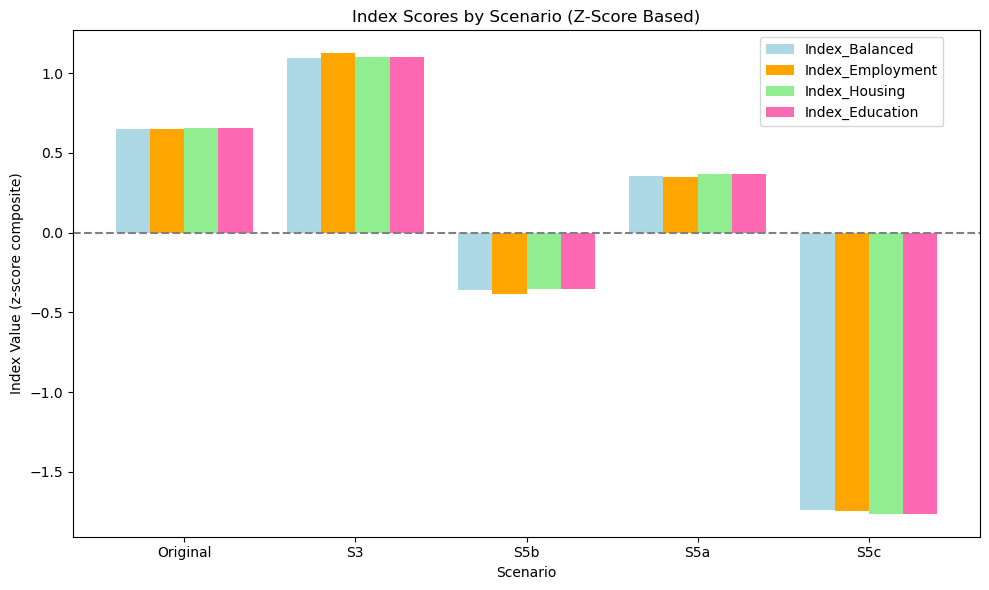

In [24]:
# Define custom colors
colors = ['#ADD8E6', '#FFA500', '#90EE90', '#FF69B4']
index_cols = ["Index_Balanced", "Index_Employment", "Index_Housing", "Index_Education"]

# Create the plot
ax = df_scaled.set_index("Scenario")[index_cols].plot(
    kind="bar",
    figsize=(10, 6),
    color=colors,
    width=0.8
)

plt.title("Index Scores by Scenario (Z-Score Based)")
plt.ylabel("Index Value (z-score composite)")
plt.xlabel("Scenario")
plt.xticks(rotation=0)
plt.axhline(0, color='gray', linestyle='--')  # to show the average baseline

# Add legend
plt.legend(bbox_to_anchor=(0.75, 1), loc='upper left')

plt.tight_layout()
plt.show()

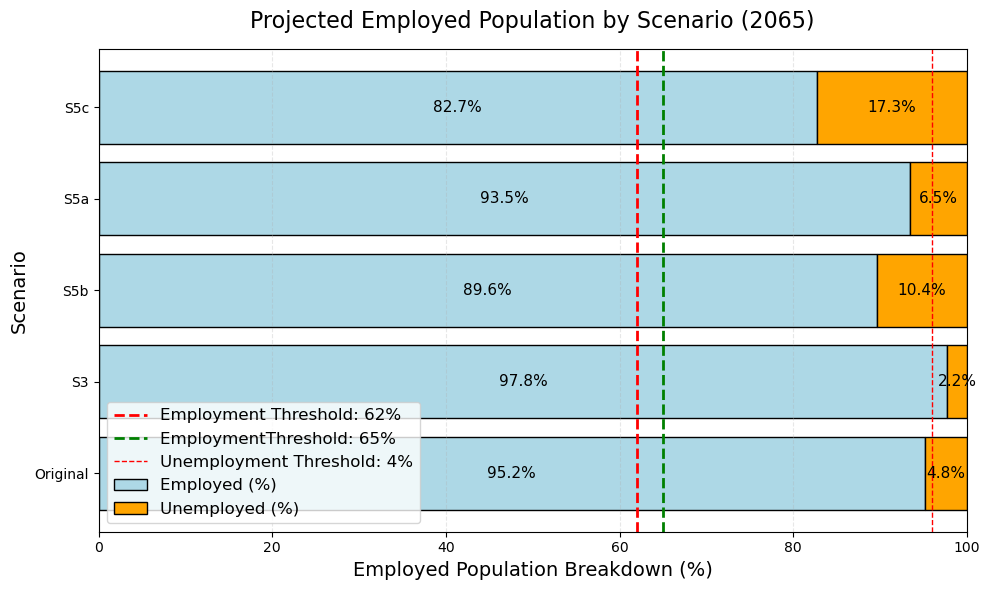

In [16]:

# Define colors
employed_color = '#ADD8E6'    # Light Blue
unemployed_color = '#FFA500'  # Orange
black_rgb = '#000000'

# Extract data
regions = erie_2065_combined["Scenario"].tolist()
employed = erie_2065_combined["TOTAL_EMPLOYED_PERCENTAGE"]
unemployed = erie_2065_combined["UNEMPLOYMENT_RATE"]

# Plot
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

# Horizontal stacked bars
bars1 = ax.barh(regions, employed, color=employed_color, edgecolor=black_rgb, label='Employed (%)')
bars2 = ax.barh(regions, unemployed, left=employed, color=unemployed_color, edgecolor=black_rgb, label='Unemployed (%)')

# Add values to bars
for i in range(len(regions)):
    ax.text(employed[i] / 2, i, f'{employed[i]:.1f}%', va='center', ha='center', color='black', fontsize=11)
    ax.text(employed[i] + unemployed[i] / 2, i, f'{unemployed[i]:.1f}%', va='center', ha='center', color='black', fontsize=11)

# Add threshold lines
ax.axvline(62, color='red', linestyle='--', linewidth=2, label='Employment Threshold: 62%')
ax.axvline(65, color='green', linestyle='--', linewidth=2, label='EmploymentThreshold: 65%')
ax.axvline(96, color='red', linestyle='--', linewidth=1, label='Unemployment Threshold: 4%')

# Aesthetics
ax.set_xlabel('Employed Population Breakdown (%)', fontsize=14, color=black_rgb)
ax.set_ylabel('Scenario', fontsize=14, color=black_rgb)
ax.set_title('Projected Employed Population by Scenario (2065)', fontsize=16, color=black_rgb, pad=15)
ax.set_xlim(0, 100)
ax.tick_params(axis='both', colors=black_rgb)
ax.grid(axis='x', linestyle='--', alpha=0.3)
ax.legend(loc='lower left', fontsize=12)

plt.tight_layout()
plt.show()



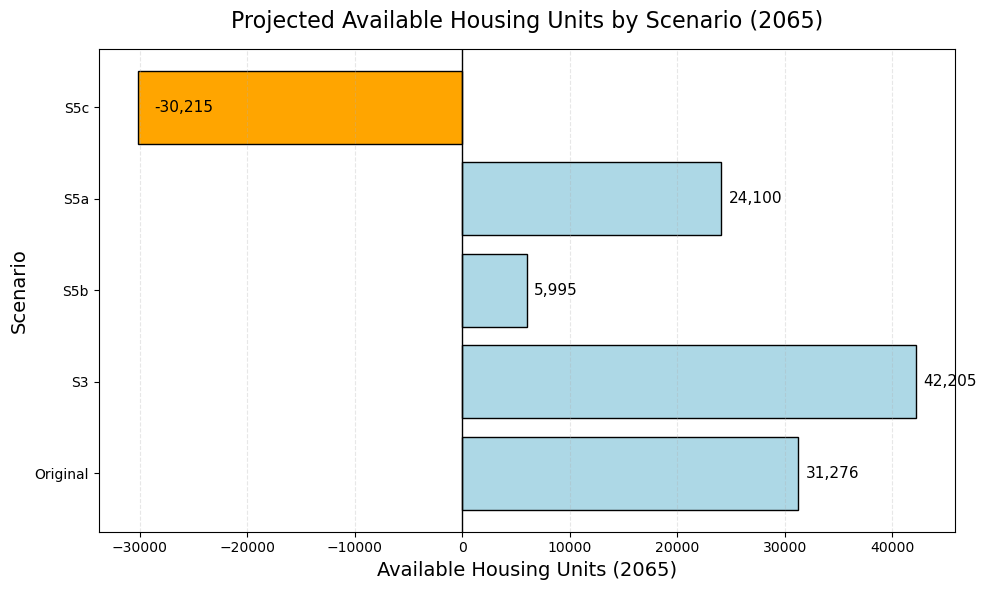

In [17]:
# Define CMYK-style hex colors
blue_rgb = '#ADD8E6'   
orange_rgb = '#FFA500' 
red_rgb = '#FF001A'
black_rgb = '#000000'

# Extract data
regions = erie_2065_combined["Scenario"].tolist()
erie_2065_combined_housing_units = erie_2065_combined["AVAILABLE_HOUSING_UNITS"]

# Assign colors based on sign
colors = [blue_rgb if val >= 0 else orange_rgb for val in erie_2065_combined_housing_units]

# Plot
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')
bars = ax.barh(regions, erie_2065_combined_housing_units, color=colors, edgecolor=black_rgb)

# Add value labels to bars
for bar in bars:
    width = bar.get_width()
    label_x = width + 700 if width > 0 else width + 7000
    align = 'left' if width > 0 else 'right'
    ax.text(label_x, bar.get_y() + bar.get_height() / 2,
            f'{width:,.0f}', va='center', ha=align,
            color='black', fontsize=11)

# Aesthetics
ax.set_xlabel('Available Housing Units (2065)', fontsize=14, color=black_rgb)
ax.set_ylabel('Scenario', fontsize=14, color=black_rgb)
ax.set_title('Projected Available Housing Units by Scenario (2065)', fontsize=16, color=black_rgb, pad=15)
ax.axvline(0, color=black_rgb, linewidth=1)
ax.tick_params(axis='both', colors=black_rgb)
ax.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()



In [18]:
erie_df['HOUSE_AFFORDABILITY_PERCENT'] = erie_df['HOUSE_AFFORDABILITY'] * 100
erie_affordability_by_year_df = erie_df[['Year', 'HOUSE_AFFORDABILITY_PERCENT']]
erie_affordability_by_year_df

KeyError: 'HOUSE_AFFORDABILITY'

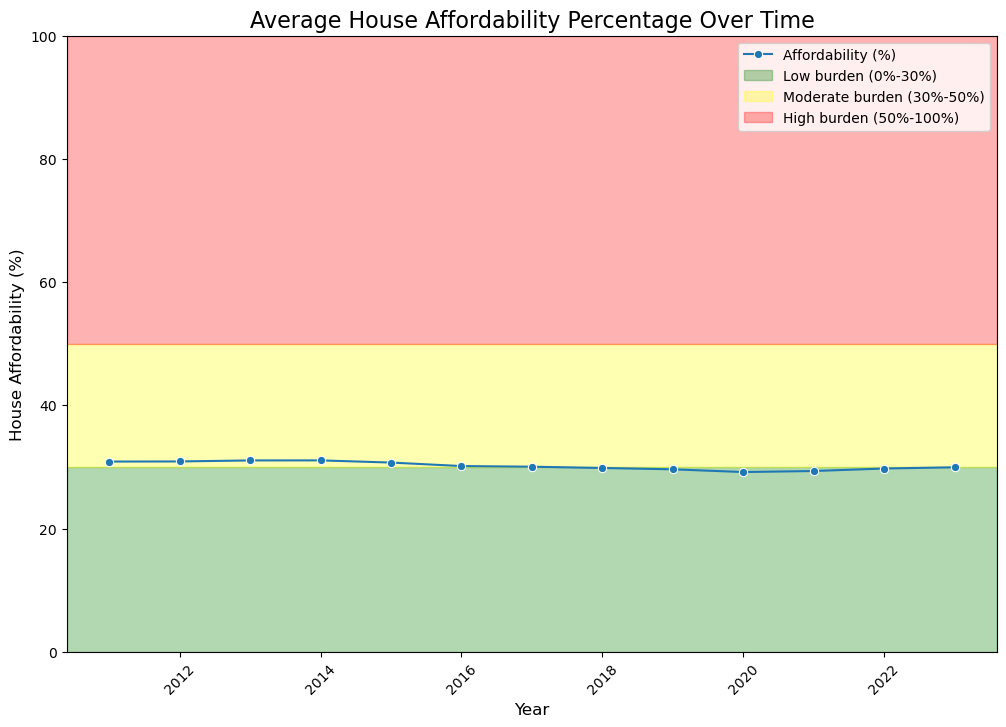

In [ ]:
# Create a time series line plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='HOUSE_AFFORDABILITY_PERCENT', data=erie_affordability_by_year_df, marker='o', label='Affordability (%)')

# Add a red dotted threshold line at 30%

plt.axhspan(0, 30, color='green', alpha=0.3, label='Low burden (0%-30%)')
plt.axhspan(30, 50, color='yellow', alpha=0.3, label='Moderate burden (30%-50%)')
plt.axhspan(50, 100, color='red', alpha=0.3, label='High burden (50%-100%)')

# Add titles and labels
plt.title('Average House Affordability Percentage Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('House Affordability (%)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)

plt.ylim(0, 100)  # Set y-axis limits to 0-100%')
plt.show()


In [ ]:
erie_df["LABOR_FORCE_PERCENTAGE"] = (  erie_df["TOTAL_LABOR_FORCE"] / erie_df["POPULATION"] ) * 100
erie_labor_force_df = erie_df[['Year', 'LABOR_FORCE_PERCENTAGE']]
erie_labor_force_df

,Year,LABOR_FORCE_PERCENTAGE
12,2023,51.433092


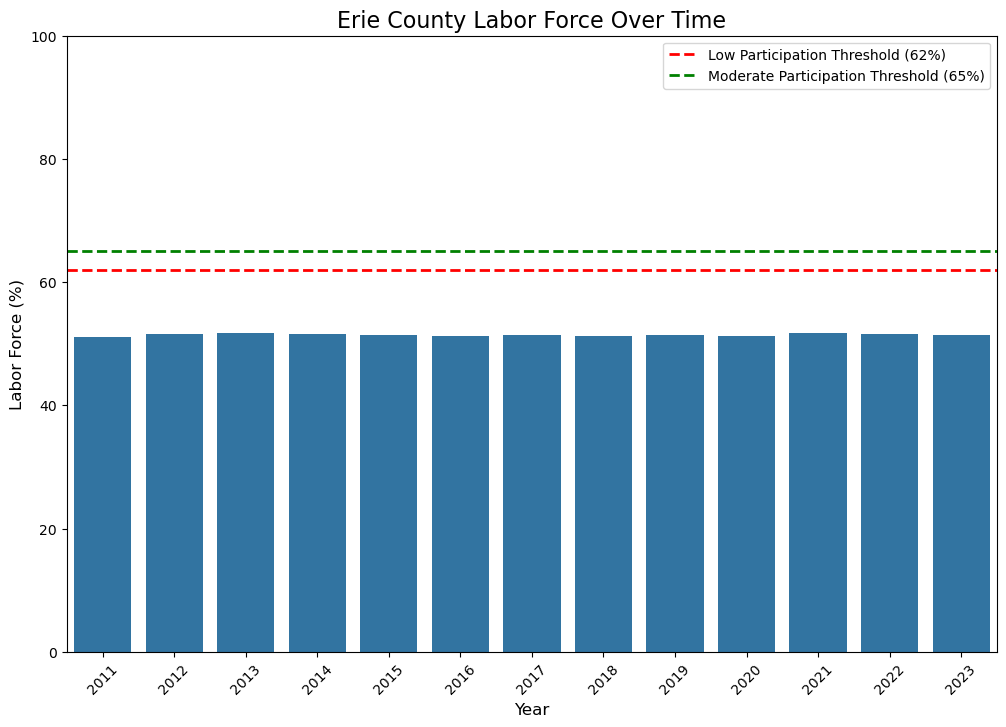

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='LABOR_FORCE_PERCENTAGE', data=erie_labor_force_df)

# Add horizontal threshold lines
plt.axhline(62, color='red', linestyle='--', linewidth=2, label='Low Participation Threshold (62%)')
plt.axhline(65, color='green', linestyle='--', linewidth=2, label='Moderate Participation Threshold (65%)')

# Add titles and labels
plt.title('Erie County Labor Force Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Labor Force (%)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)

plt.ylim(0, 100)  # Set y-axis limits to 0-100%
plt.show()